## 숫자 2개를 구분했으니 3개도 가능하겠지?

3, 8, 9 를 분류하는 딥러닝 모델을 만들어보자!

In [1]:
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


데이터를 로드하기, 0-9 까지 있는데, 우리는 이중에서 3, 8, 9 이렇게 3개만 사용할테니, 데이터의 숫자는 1/3정도로 줄어들게 된다.

In [4]:
## 3,8,9 구분하기 
three_eight_nine_train_idx = ((y_train == 3) | (y_train == 8) | (y_train == 9))
x_train = x_train[three_eight_nine_train_idx]
y_train = y_train[three_eight_nine_train_idx]

three_eight_nine_test_idx  = ( (y_test==3) | (y_test==8) | (y_test==9) )
x_test = x_test[three_eight_nine_test_idx]
y_test = y_test[three_eight_nine_test_idx]

앞에서 보았듯이 scaling을 하고 안하고에 따라 성능차이가 다소 발생하므로 0~1 로 스케일링을 해준다.

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

간단한 모델을 만들어보자, activation 없이 그냥 3개 layer를 fully connected 해서 모델을 만들었다. 마지막 출력층은 실수값 1개로 출력받고, 이 최종 출력이 y값과 비슷하게 만드는게 목적!

In [6]:
input_shape = (28,28)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(),
        keras.layers.Dense(64),
        keras.layers.Dense(32), ## change it later
        keras.layers.Dense(1)
    ]           
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52353 (204.50 KB)
Trainable params: 52353 (204.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이번에도 Loss 는 mse 를 설정하였다. 다만 조금있다 리뷰하겠지만 사실 mse 자체를 좋은 loss 라고 하기에는 좀 그렇다. 
일단 optimizer 와 loss 를 지난 8-9 분류할때와 같이 셋업하고 돌려보면

In [7]:
model.compile( loss = "mse", optimizer="adam" )
model.fit(x= x_train, y = y_train, validation_split=0.1, epochs=20)

Epoch 1/20
505/505 [==============================] - 1s 964us/step - loss: 3.5125 - val_loss: 2.2859
Epoch 2/20
505/505 [==============================] - 0s 742us/step - loss: 2.0808 - val_loss: 1.7084
Epoch 3/20
505/505 [==============================] - 0s 707us/step - loss: 1.7932 - val_loss: 1.7059
Epoch 4/20
505/505 [==============================] - 0s 699us/step - loss: 1.7016 - val_loss: 1.5255
Epoch 5/20
505/505 [==============================] - 0s 728us/step - loss: 1.6662 - val_loss: 1.7018
Epoch 6/20
505/505 [==============================] - 0s 849us/step - loss: 1.6537 - val_loss: 1.6180
Epoch 7/20
505/505 [==============================] - 0s 707us/step - loss: 1.6377 - val_loss: 1.5247
Epoch 8/20
505/505 [==============================] - 0s 703us/step - loss: 1.6322 - val_loss: 1.4796
Epoch 9/20
505/505 [==============================] - 0s 705us/step - loss: 1.6316 - val_loss: 1.4919
Epoch 10/20
505/505 [==============================] - 0s 703us/step - loss: 1.619

적당히 로스가 줄어들면서 학습이 되는듯하지만 일정 수준이하로는 줄 지 않는다. 특히 평균 1.5 정도의 오차는 생각보다 크다.

test 데이터에 대해서 확인 후 정분류율(accuracy)를 계산해보면

In [8]:
predicted_value = model.predict(x_test)

94/94 [==============================] - 0s 457us/step


In [9]:
correct = wrong = 0
for i in range(len(y_test)):
    if y_test[i] == round(predicted_value[i][0]):
        correct = correct+1
    else:
        wrong = wrong + 1

In [10]:
print( "accuracy : " , (correct) / (correct+wrong) )

accuracy :  0.37988640160374204


생각보다 처참하다. 3개중 1개를 맞추는 거니, 그냥 찍어도 33% 가 나와야하는데, 그보다 아주 살짝 높은 정도의 성능이다. -- 찍기보다 아주 살짝 좋은 정도인데, 이걸 분류기로 사용할 수 는 없겠다. 왜 이렇게 됬는지 예측 결과의 분포를 보면

(array([  2.,   1.,   0.,   3.,   6.,   5.,   9.,   9.,  15.,  15.,  21.,
         36.,  30.,  41.,  47.,  48.,  50.,  49.,  63.,  67.,  63.,  58.,
         65.,  55.,  45.,  42.,  31.,  31.,  39.,  27.,  22.,  38.,  22.,
         44.,  49.,  45.,  69.,  76.,  95.,  86., 110., 138., 140., 128.,
        144., 134., 163., 131.,  99., 107.,  57.,  39.,  30.,  20.,   7.,
          8.,  13.,   3.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([-1.88433647e-01,  4.73590195e-03,  1.97905451e-01,  3.91075015e-01,
         5.84244549e-01,  7.77414083e-01,  9.70583677e-01,  1.16375315e+00,
         1.35692275e+00,  1.55009234e+00,  1.74326181e+00,  1.93643141e+00,
         2.12960100e+00,  2.32277060e+00,  2.51593995e+00,  2.70910954e+00,
         2.90227914e+00,  3.09544873e+00,  3.28861833e+00,  3.48178768e+00,
         3.67495728e+00,  3.86812687e+00,  4.06129646e+00,  4.25446606e+00,
         4.44763565e+00,  4.64080524e+00,  4.83397484e+00,  5.02714396e+00,
         5.22031355e+00,  5.413483

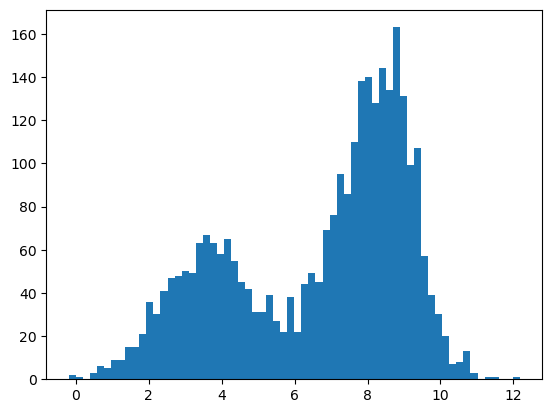

In [11]:
plt.hist(predicted_value, bins=64)

3언저리와 8,9 언저리를 분류하려는 시도는 한거 같은데, 도무지 8과 9를 구분하지 못한다. 게다가 2, 5 같은 넓은 분포가 나오는데, 예를들어 예측값이 2.312 뭐 이런값이 나왔다면 이게 3의 분포에서부터 나왔다고 판단하는게 적합하겠지만, 우리는 이걸 분류할때 반올림을 하니까 이게 2로 가서 붙어서 대충 잘 예측했음에도 불구하고 정확한 값이 나오지는 않는다... 분류기 성능을 좀 더 올릴 필요가 있다. 역시 분류기 성능 올리는 여러 방법중에 가장 우선적으로 시도해볼만한 것은 non-linearity 를 추가하는 activation 함수를 추가하는 것이다.

In [12]:
input_shape = (28,28)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(),
        keras.layers.Dense(64),
        keras.layers.Dense(16, activation='relu'), ## change it later
        keras.layers.Dense(1)
    ]           
)

거의 똑같은 모델에 relu 함수만 추가했다. 이제 똑같이 학습해서 결과를 보면

In [13]:
model.summary()
model.compile( loss = "mse", optimizer="adam" )
model.fit(x= x_train, y = y_train, validation_split=0.1, epochs=20)
predicted_value = model.predict(x_test)
correct = wrong = 0
for i in range(len(y_test)):
    if y_test[i] == round(predicted_value[i][0]):
        correct = correct+1
    else:
        wrong = wrong + 1
print( "accuracy : " , (correct) / (correct+wrong) )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 51297 (200.38 KB)
Trainable params: 51297 (200.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
505/505 [==============================] - 1s 845us/step - loss: 3.3090 - val_loss: 1.6606
Epoch 2/20
505/505 [==========================

정답율이 80% 정도로 성능이 월등히 향상되었다. activation 함수를 하나 넣었을 뿐인데 놀라울만큼 결과가 향상된다. relu 가 학습이 빨라서 자주 사용되지만, relu 외 다른 함수를 넣어도 괜찮다. 예를들어 tanh 를 넣고 돌리면 0 근처에선 linear 하고 큰 값에서는 bounded 된 값을 보여주기 때문에 이런 경우 나쁘지 않다.

이제 이 분류기로 예측한 결과의 분포를 보면

(array([  2.,   0.,   1.,   0.,   0.,   4.,   4.,   3.,   6.,  25.,  74.,
        198., 262., 166.,  99.,  42.,  26.,   9.,  12.,  10.,  12.,   7.,
         11.,   6.,   4.,   3.,   4.,   2.,   6.,   5.,   4.,   2.,   3.,
          1.,   4.,   6.,  10.,   8.,  11.,  16.,  20.,  34.,  37.,  56.,
         53.,  93., 127., 125., 145., 116.,  99.,  80., 135., 167., 255.,
        206., 103.,  44.,  12.,   7.,   4.,   4.,   1.,   2.]),
 array([ 1.2851954,  1.4222397,  1.5592841,  1.6963284,  1.8333728,
         1.9704171,  2.1074615,  2.244506 ,  2.3815503,  2.5185945,
         2.655639 ,  2.7926834,  2.9297276,  3.066772 ,  3.2038164,
         3.3408606,  3.477905 ,  3.6149495,  3.7519937,  3.889038 ,
         4.0260825,  4.163127 ,  4.3001714,  4.4372153,  4.5742598,
         4.711304 ,  4.8483486,  4.985393 ,  5.1224375,  5.2594814,
         5.396526 ,  5.5335703,  5.6706147,  5.807659 ,  5.9447036,
         6.081748 ,  6.218792 ,  6.3558364,  6.492881 ,  6.6299253,
         6.7669697,  6

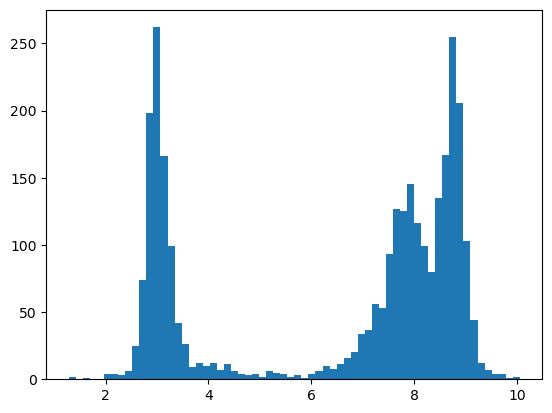

In [14]:
plt.hist(predicted_value, bins=64)

히스토그램으로부터 몇가지를 생각해볼만하다


1. <b>mean square error 가 이런 분류 문제에 적합한 것일까?

    mse 는  (실제값-예측값)^2 을 사용한다. 근데,  우리는 8을 8으로 예측하는게 맞고, 8을 3로 예측하든, 8을 9로 예측하든 틀린건 매한가지인데, mse 입장에서는 맞게 예측했을때의 loss 는 (8-8)^2 니까 0 이지만, 틀렸을 때에는 3으로 예측해서 틀렸을때와, 9로 예측해서 틀렸을때 값이 다르다.

    - 8을 3으로 잘못 예측했을 때의 loss = (8-3)^2 = 25
    - 8을 9로 잘못 예측했을 때의 loss = (8-9)^2 = 1

    즉 우리는 이리틀리나, 저리틀리나 같은 loss 를 주고 싶은데, 분류기 입장에서는 3으로 틀리는것보다 9로 틀리는게 패널티가 더 적기 때문에 3으로 예측하기보다는 아무리 3인거 같아도 적당이 어중간한 값을 선호하게 된다. 즉 중간정도에 값을 자꾸 뱉어내려는 경향이 생긴다. -> 분포에서 원래 없던 4, 5, 6, 7 사이의 값들이 자꾸 나오는 이유

3. <b>그 실수값에 반올림하는게 맞나?

   예를들어 위 분포에서 3.9 라는 값이 나왔다면, 그건 아마도 "3" 을 예측했을 것이다라는걸 쉽게 알 수 있다. 다만 3.9 라는 값을 반올림하면 4가 되는데, 우리는 애초에 4라는 값을 기대한 적도 없었다. 따라서 최종 적으로 나온 값이 어떤 분포에서 부터 나왔을 것이다라는걸 (확률적으로) 추정해야하는데 이걸 하기에 반올림은 적합하지 않다.


## 따라서 분류 문제에서는 회귀 문제와 다르게 다음의 2가지 테크닉을 사용한다.

1.  One-hot encoding 을 사용해서 각 category 를 n 개의 dummy variable 로 만든다.

2.  softmax 를 사용해서 최종 출력값을 마치 확률처럼 변환한다.



   

실제 onehot encoding 이 어떻게 진행되는지 코드를 보면 직관적으로 이해가 된다. keras 에서도 categorical encoder 를 제공하지만, 이해를 돕기 위해서 여기서는 scikit-learn 의 onehot encoder 를 사용했다.

In [15]:
from sklearn.preprocessing import OneHotEncoder # 필요한 페키지를 로드하고

enc = OneHotEncoder(handle_unknown='ignore') #원핫 인코더를 생선한다. ignore 옵션은 나중에 역변환 할떄 에러를 방지하기위한 옵션이다.

y_train= y_train.reshape(-1,1) #scikit learn 은 들어가는 모든애들이 2차원 (dataframe형식) 이어야 해서 format 을 맞춰줘야한다.
y_test = y_test.reshape(-1,1)

X = [3, 8, 9] # 내가 가진 범주는 아래와 같이 3개가 있다고 알려주고

enc.fit( np.array(X).reshape(-1, 1) ) # 인코더를 학습(fit) 시켜준다.

OneHotEncoder(handle_unknown='ignore')

In [16]:
y_train_onehot = enc.transform(y_train).toarray() #학습된 인코더로 y_label 을 변환(tranform) 한다. 
y_test_onehot = enc.transform(y_test).toarray()

인코더로 변환된 값은 아래처럼 더미 변수에 각각 0 또는 1이 들어간 식으로 변환이 된다. 처음 10개의 label 이 어떻게 변했는지 확인해보면 

In [17]:
for i in range(10):
    print( y_train[i],  " ==> " , y_train_onehot[i])

[9]  ==>  [0. 0. 1.]
[3]  ==>  [1. 0. 0.]
[3]  ==>  [1. 0. 0.]
[3]  ==>  [1. 0. 0.]
[8]  ==>  [0. 1. 0.]
[9]  ==>  [0. 0. 1.]
[9]  ==>  [0. 0. 1.]
[3]  ==>  [1. 0. 0.]
[3]  ==>  [1. 0. 0.]
[8]  ==>  [0. 1. 0.]


위와 같이 3 은 (1, 0, 0) 으로,  8 은 (0, 1, 0) 으로, 그리고 9 는 (0, 0, 1) 로 변환이 된다. 어차피 더미로 만들어진 변수이므로 순서나 그런건 중요하지 않다. 일관적으로 모든 3은 (1, 0, 0) 으로 변환되고 9는 (0, 0, 1) 로 변환된다는 사실만 중요하지 (나중에 역변환을 하려면 이 규칙이 필요하긴하다.) 

이 3개의 더미 변수는 각각 3이냐 8이냐 9냐를 뜻하는 확률 분포로 해석해도 된다. 

예를들어 3 = [1, 0, 0] 이라면

[0.9, 0.0, 0.1] 은  3일 확률은 90%, 9일 확률은 10% 라는 식으로

최종 답안지를 위처럼 3개의 dummy 변수로 만들었으니, 이제 우리 모델도 최종적으로 뱉어야 하는 값은 3개다. 

마지막에 확률 비스무리하게 만들어야 하니, softmax 라는 activation 함수를 사용한다. 이 함수는 3개의 값의 합이 1이 되도록 변환해주며 변환하는 수식은 다음과 같다.

https://ko.wikipedia.org/wiki/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%ED%95%A8%EC%88%98
(한글 위키는 뭔가 이상하다... 여기를 참조하는게 좋을 듯 https://en.wikipedia.org/wiki/Softmax_function)

In [18]:
input_shape = (28,28)

model2 = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(),
        keras.layers.Dense(64),
        keras.layers.Dense(16),
        keras.layers.Dense(3, activation='softmax') ## softmax ->  합이 1이 되게 바꿔주는 함수 
    ]           
)

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 51331 (200.51 KB)


Trainable params: 51331 (200.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이제 모델을 컴파일해보자. 이제 최종 출력단이 바뀌었으므로, 로스함수도 같이 바뀌어야 한다.
전에는 1개의 값에 대해서 (실제값-예측값) 의 차이를 썼지만, 지금은 최종단이 3개의 노드에 대한 확률분포이므로 확률 분포간의 차이를 로스로 써야하는게 인지상정! 이런 경우에 사용하는게 크로스엔트로피이다. 용어는 어려워 보이지만, 사실 loss 수식은 굉장히 간단한데 (https://en.wikipedia.org/wiki/Cross-entropy) 

그냥 간단하게 이야기하면

정답 분포를 얼마나 자신있게 맞추었냐이다.

[0, 1, 0] 이 정답인데, 이걸 [0.2, 0.5, 0.3] 으로 예측했다면 맞추긴 했다고 할 수 있지만 (가운데가 제일 높으니까) 그래도 완벽하진 않다. 이경우에는 

-log(0.5) 만큼 로스가 발생한다.  

반면에 [0.1, 0.9, 0] 으로 예측했다면 거의 정답에 가깝게 예측했다고 할 수 있다. 이 경우에는

-log(0.9) 만큼 로스가 발생한다.

앞에 -부호가 있으므로 로스는 후자가 더 적다. 모델은 어찌됬든 로스를 작게 만드는게 학습의 목적이므로, 정점 정답 분포에 가깝게 갈 것이다. 따라서 원핫 인코딩된 확률 분포를 닮게 만들고 싶다면 cross entropy 를 손실함수로 사용하면 된다. 

In [19]:
model2.compile( loss = 'categorical_crossentropy', optimizer='adam')
model2.fit( x=x_train, y=y_train_onehot, validation_split=0.1, epochs=20)

Epoch 1/20
505/505 [==============================] - 1s 850us/step - loss: 0.1778 - val_loss: 0.1350
Epoch 2/20
505/505 [==============================] - 0s 702us/step - loss: 0.1343 - val_loss: 0.1298
Epoch 3/20
505/505 [==============================] - 0s 698us/step - loss: 0.1261 - val_loss: 0.1028
Epoch 4/20
505/505 [==============================] - 0s 841us/step - loss: 0.1238 - val_loss: 0.1217
Epoch 5/20
505/505 [==============================] - 0s 743us/step - loss: 0.1185 - val_loss: 0.1135
Epoch 6/20
505/505 [==============================] - 0s 821us/step - loss: 0.1152 - val_loss: 0.1074
Epoch 7/20
505/505 [==============================] - 0s 743us/step - loss: 0.1161 - val_loss: 0.1088
Epoch 8/20
505/505 [==============================] - 0s 706us/step - loss: 0.1124 - val_loss: 0.0995
Epoch 9/20
505/505 [==============================] - 0s 744us/step - loss: 0.1127 - val_loss: 0.1013
Epoch 10/20
505/505 [==============================] - 0s 702us/step - loss: 0.110

학습이 되었다. mse 를 손실함수로 사용했던 과거와 다르게 이제 로스가 cross entropy 이므로 직관적으로 이게 얼마나 잘된건지 이해하긴 힘들다. 다만 loss 가 충분히 줄었다는 트렌드만 확인할 수 있으면 된다. 이제 이 모델로 예측을 해보자

In [20]:
predicted_value = model2.predict(x_test)

94/94 [==============================] - 0s 459us/step


모델의 최종단이 바뀌었기 때문에 (3개의 노드 출력, 합은 1) 최종 예측값도 아래처럼 3개가 한쌍이 되서 나온다.

In [21]:
predicted_value

array([[2.1893775e-06, 6.8065834e-05, 9.9992979e-01],
       [1.7853539e-08, 1.8671020e-05, 9.9998128e-01],
       [3.1821377e-04, 8.6501735e-05, 9.9959534e-01],
       ...,
       [4.9306364e-03, 9.9506420e-01, 5.1903812e-06],
       [1.3639410e-08, 2.4266742e-06, 9.9999762e-01],
       [9.9999964e-01, 3.1202842e-07, 2.1544585e-08]], dtype=float32)

각각 3개의 분포중에 어디에 해당하는지를 확률적으로 나타내는 것이므로, 이 중에서 가장 큰 값을 1로, 나머지는 0으로 만들어야 한다. (원래는 numpy 의 argmax를 써야 하지만, 그냥 직관적으로 젤 큰값 -> 0.5보다 클거다라고 가정하고 반올림 처리를 해서 진행하자)

In [22]:
predicted_value_onehot = np.round(predicted_value)
print(predicted_value_onehot)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


실제 답안지와 비교를 하기 위해서 저 분포를 다시 one-hot encoding 되기 전의 규칙으로 돌려보자 

[1, 0, 0] ==> 3 <br>
[0, 1, 0] ==> 8 <br>
[0, 0, 1] ==> 9 <br>

아까 원핫인코더의 inverse transform 을 하면 된다.

In [23]:
predicted_number = enc.inverse_transform(predicted_value_onehot)
predicted_number 

array([[9],
       [9],
       [9],
       ...,
       [8],
       [9],
       [3]], dtype=object)

이제 정답지와 비교해보자. 

In [24]:
correct = wrong = 0
for i in range(len(y_test)):
    if y_test[i] == predicted_number[i][0]:
        correct = correct+1
    else:
        wrong = wrong + 1


In [25]:
accuracy = (correct) / (correct+wrong)
print(accuracy)

0.9605746742398931


거의 같은 모델인데도 불구하고 96% 에 가까운 정분류율을 보여준다. 

앞서 이야기 했지만 분류율이 이렇게 획기적으로 올라간 이유는

1. 손실함수를 제대로 설정해줬기 때문에 --> 8과 9 를 예측하는데 MSE 를 쓰면 8.4, 8.6 같은 애매한 값을 자꾸 뱉으려고 노력한다. 심하게 질렀다가 틀리면 패널티가 크니까 (점수는 올라가는데 자신감이 떨어지는 현상) 따라서 맞추는거 + 얼마나 자신있게 지르느냐 둘 다를 고려한 확률 분포의 차이를 손실함수로 사용하는게 맞다.

2. 최종적으로 나온 값을 제대로 값으로 분류하기 위해 최종단을 확률분포로 받고, 이중에서 제일 높은 값을 정답으로 취하는 정책을 취했기 때문에

이렇게 정리할 수 있다.